In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [51]:
df = pd.read_csv("./Java/Output/PowVar.txt", sep='\t')
df[(df['Noise']==0.1) & (df['X']==-2.0)].head()

,NoiseType,Noise,X,pow,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
78,Gaussian,0.1,-2.0,1.0,1.003160,-2.11134,7.23159,0.219169,0.218478,0.029345,...,0.002001,0.001201,0.001301,0.001501,0.001001,0.0003,0.0005,0.0005,0.0005,0.0001
312,Uniform,0.1,-2.0,1.0,0.958322,-1.25171,2.11859,0.209373,0.218478,0.030934,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000


In [62]:
df.columns

Index(['NoiseType', 'Noise', 'X', 'pow', 'Error Deviation', 'Error Minimum',
       'Error Maximum', 'Value Deviation', 'Uncertainty', 'Mean', 'Bias',
       'Leak', '-5.0', '-4.8', '-4.6', '-4.4', '-4.2', '-4.0', '-3.8', '-3.6',
       '-3.4', '-3.2', '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8',
       '-1.6', '-1.4', '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0',
       '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0',
       '2.2', '2.4', '2.6', '2.8', '3.0', '3.2', '3.4', '3.6', '3.8', '4.0',
       '4.2', '4.4', '4.6', '4.8', '5.0'],
      dtype='object')

In [53]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.195, 0.2]

# Deviation vs Uncertainty

In [54]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'],
                sNoise=sorted(df['Noise'].unique()), noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title('(1 +/- noise)^exponent')
    ax.set_xlabel('Exponent')
    ax.set_ylabel(' or '.join(sValue))
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))


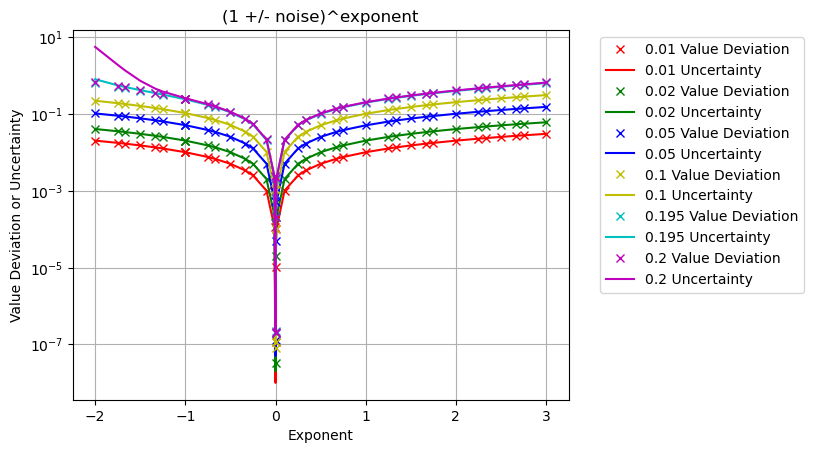

In [55]:
PlotValues()

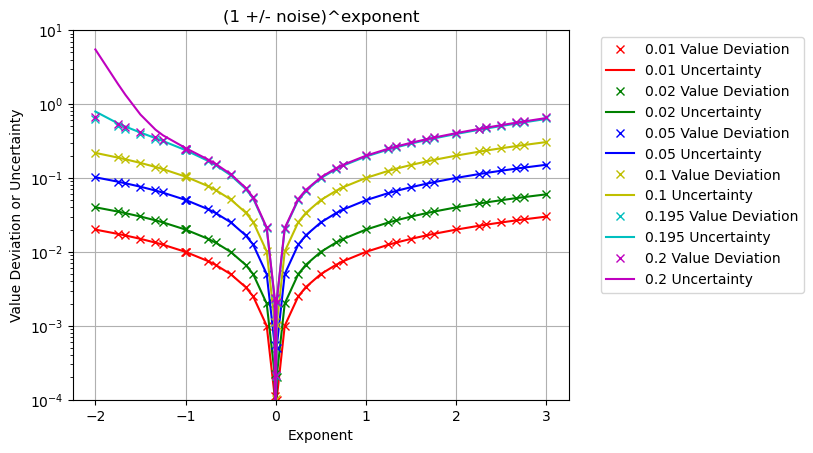

In [56]:
PlotValues(ylim=[1e-4,10])

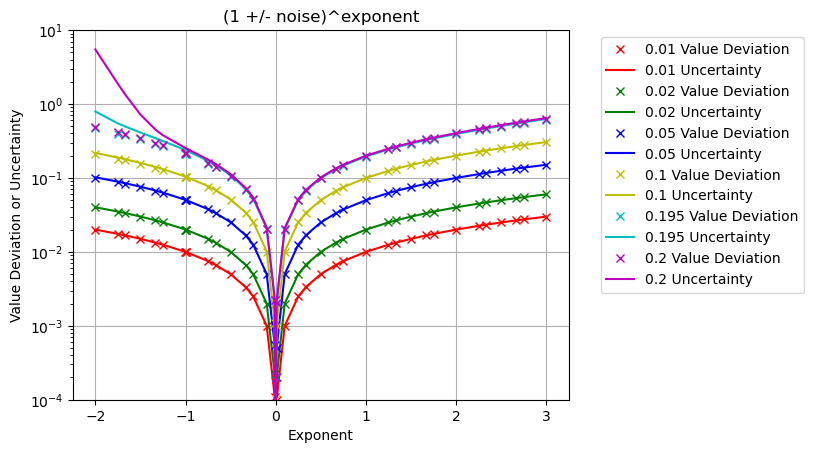

In [43]:
PlotValues(ylim=[1e-4,10], noiseType='Uniform')

In [57]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    ax.set_xlabel('c')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-4,10])
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    #ax2.set_yscale('log')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.15, 1.0))
    ax2.legend(bbox_to_anchor=(1.575, 0.3))
    

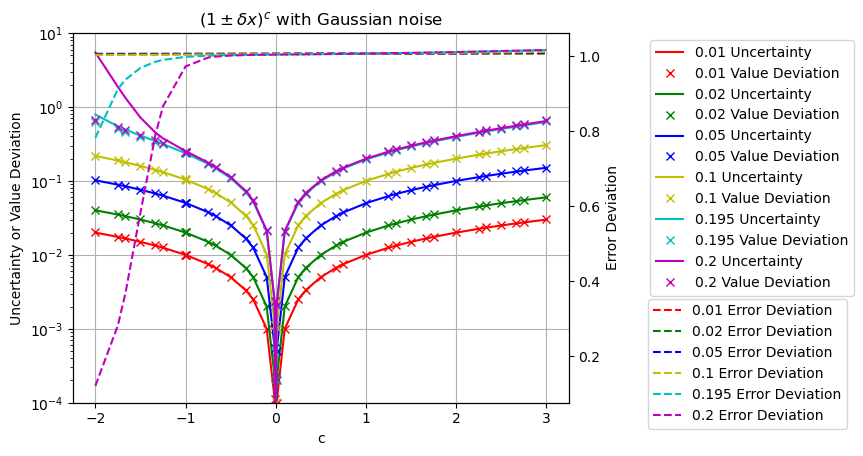

In [58]:
PlotErrorDev()

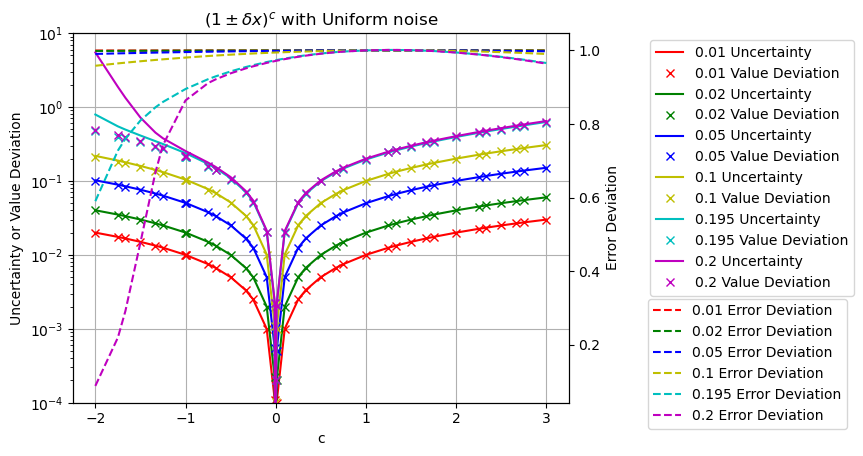

In [59]:
PlotErrorDev('Uniform')

# Mean vs Bias

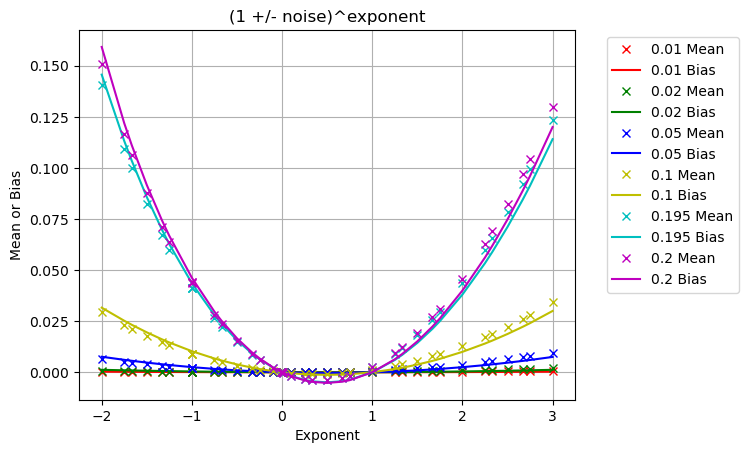

In [60]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

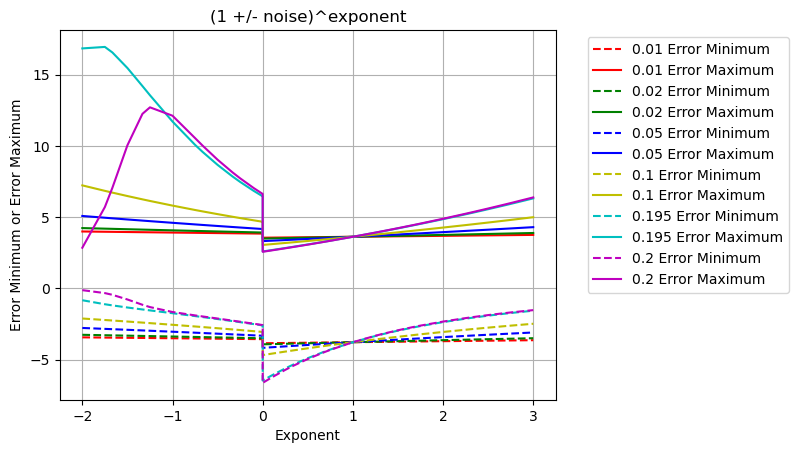

In [65]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [15]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.004301,0.002701,0.001800,0.001400,0.000800,0.000700,0.000800,0.000200,0.000200,0.000300
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.007504,0.005703,0.003802,0.002902,0.001801,0.001501,0.001101,0.000800,0.000800,0.000500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000200,...,0.009807,0.005204,0.004703,0.003502,0.002902,0.001701,0.001501,0.001101,0.000801,0.000700
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000400,0.012912,...,0.011911,0.008007,0.006406,0.004904,0.003603,0.002903,0.002002,0.001401,0.001401,0.001101
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000601,0.008212,0.038854,...,0.014721,0.010415,0.007511,0.006309,0.004106,0.003705,0.003004,0.002504,0.001502,0.001302


In [16]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique(),
               sStyle=['r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'y-', 'y--', 'c-', 'c--', 'm-', 'm--'] ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot( xlabel='Normalized Error', ylabel='Normalized Histogram Count',
                                title='(1 +/- noise)^exponent',
                                style=sStyle)
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.0, 1.0))    


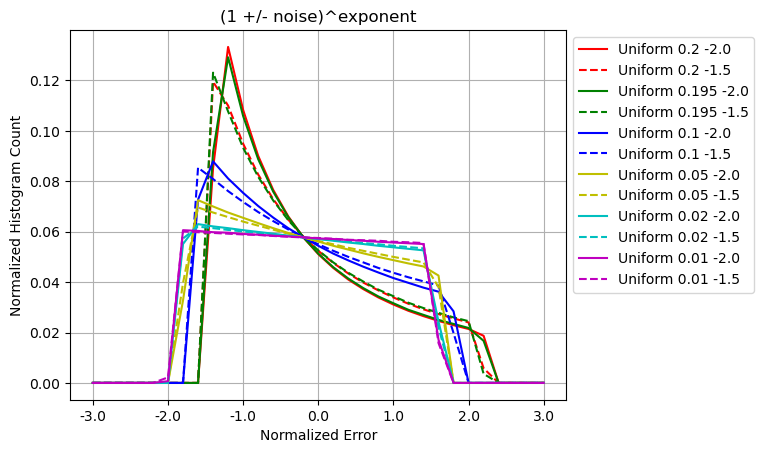

In [17]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2] )

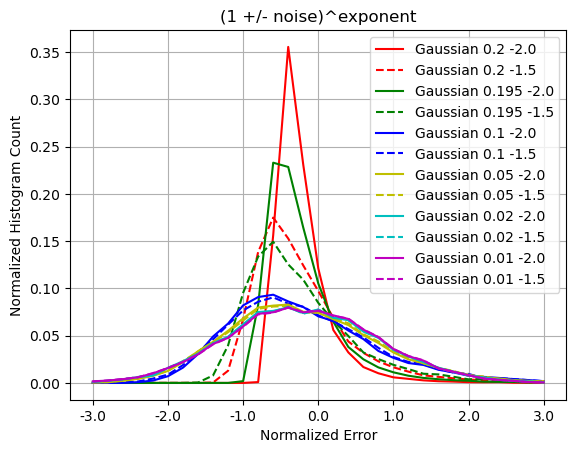

In [18]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2],sNoiseType=['Gaussian'] )

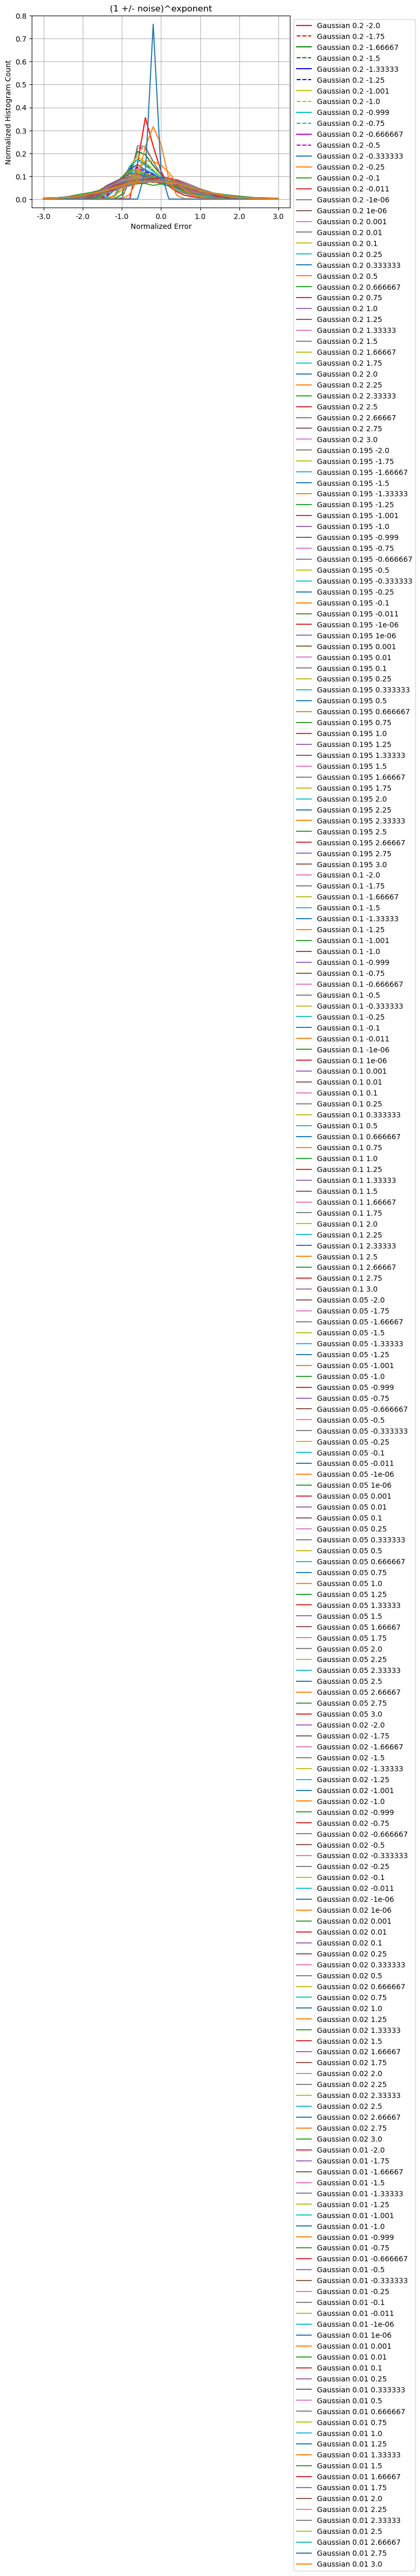

In [19]:
PlotHisto(sNoiseType=['Gaussian'])

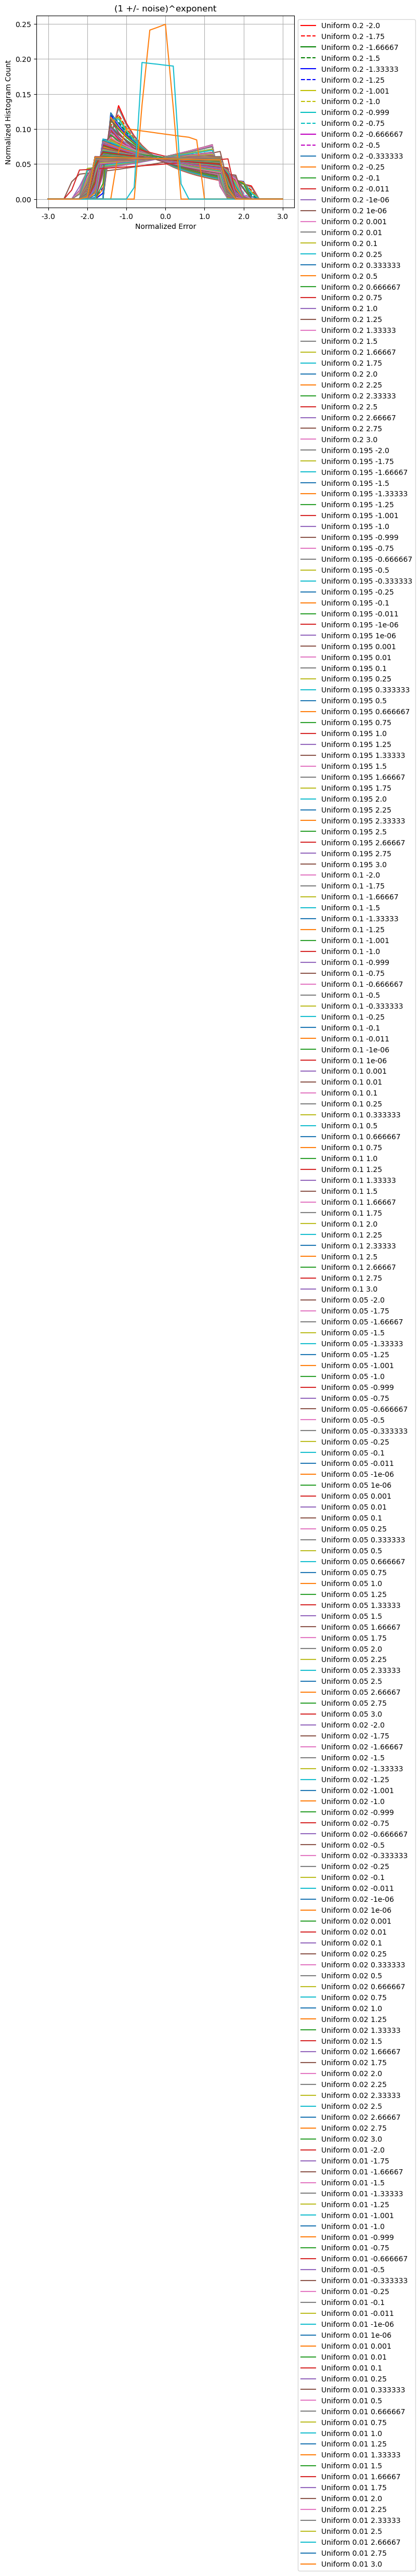

In [20]:
PlotHisto()

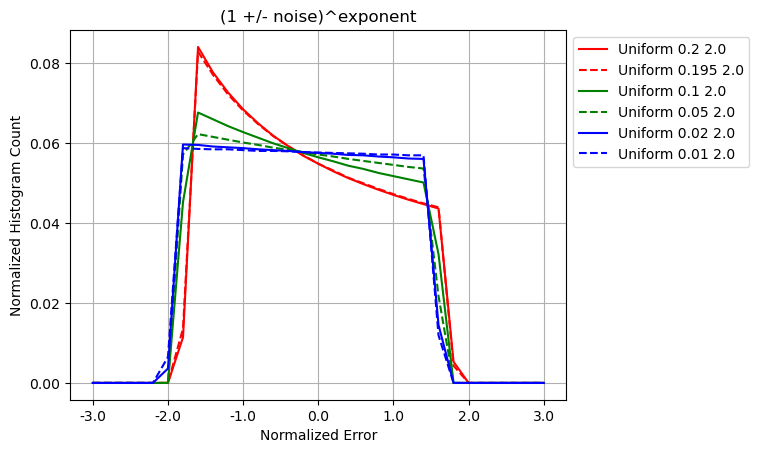

In [21]:
PlotHisto(sX=[2])

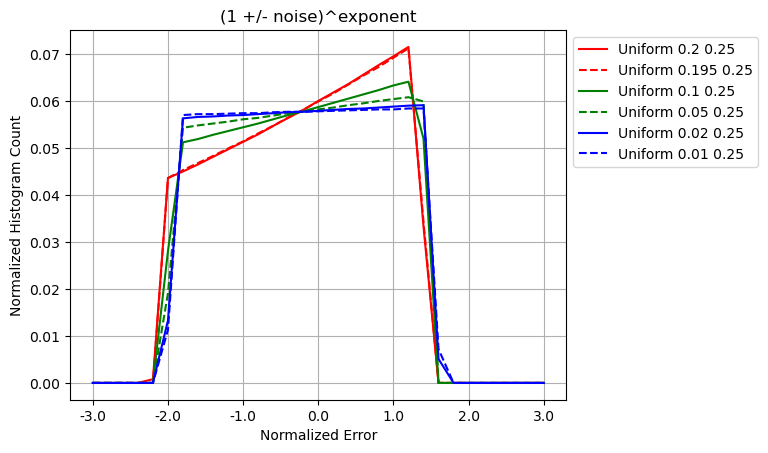

In [22]:
PlotHisto(sX=[0.25])

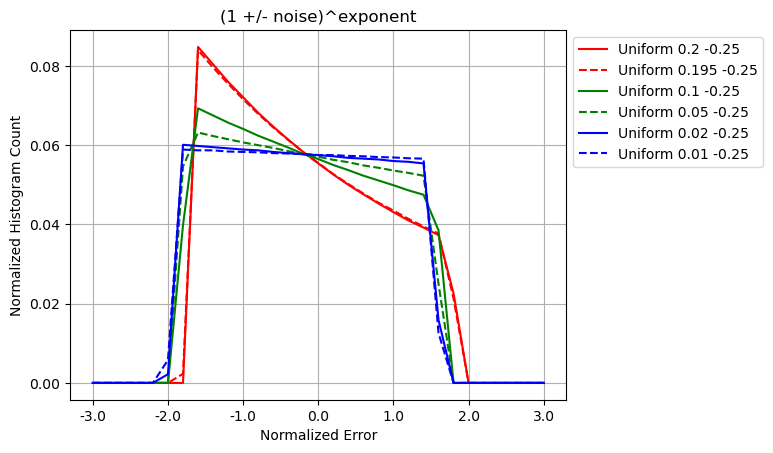

In [23]:
PlotHisto(sX=[-0.25])

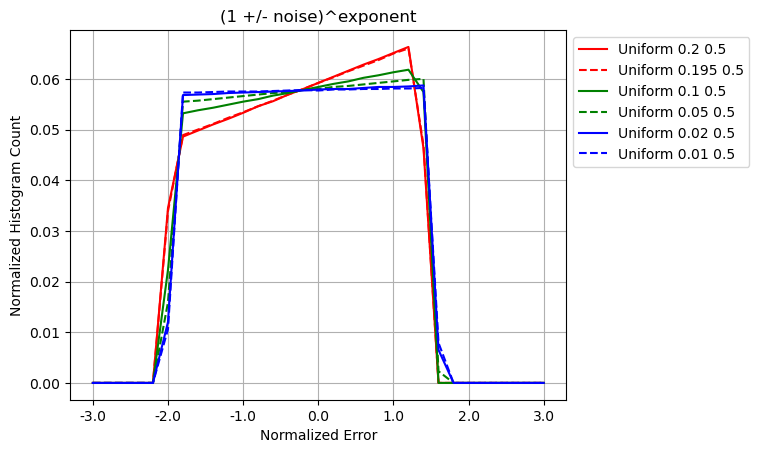

In [24]:
PlotHisto(sX=[0.5])

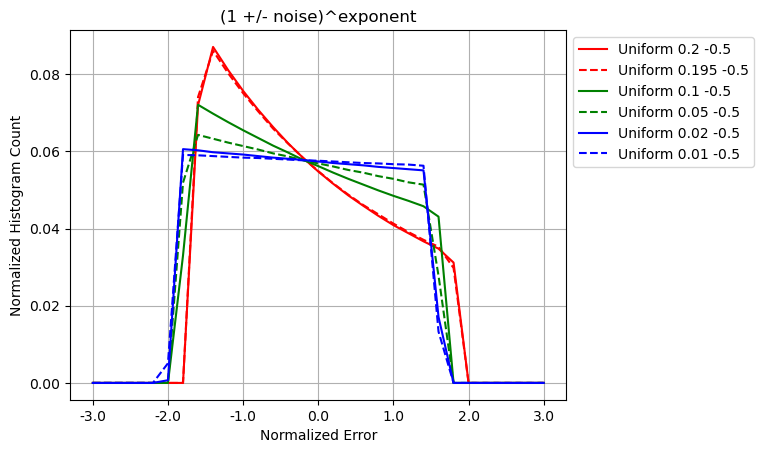

In [25]:
PlotHisto(sX=[-0.5])

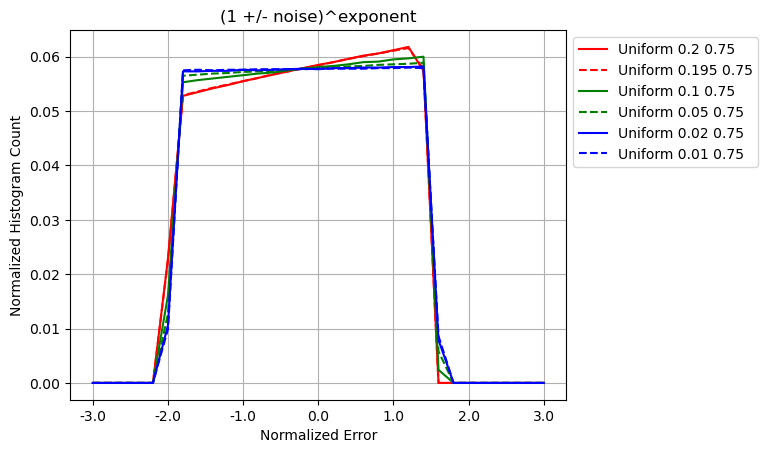

In [26]:
PlotHisto(sX=[0.75])

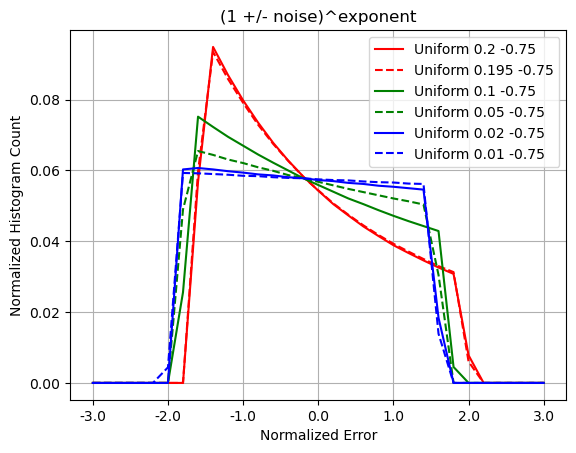

In [27]:
PlotHisto(sX=[-0.75])

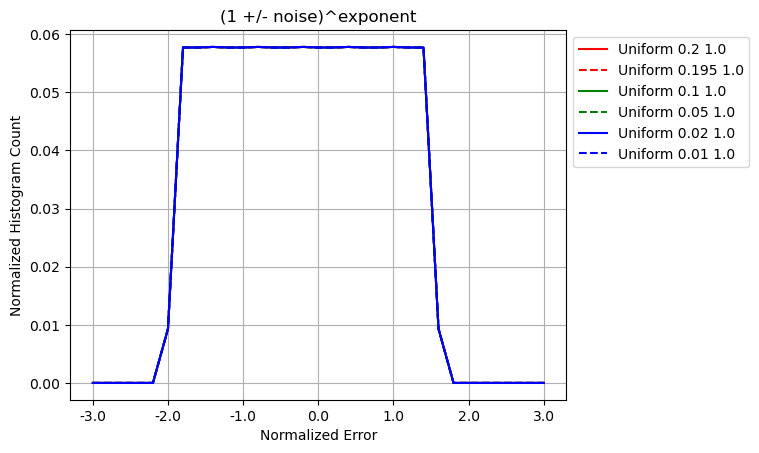

In [28]:
PlotHisto(sX=[+1])

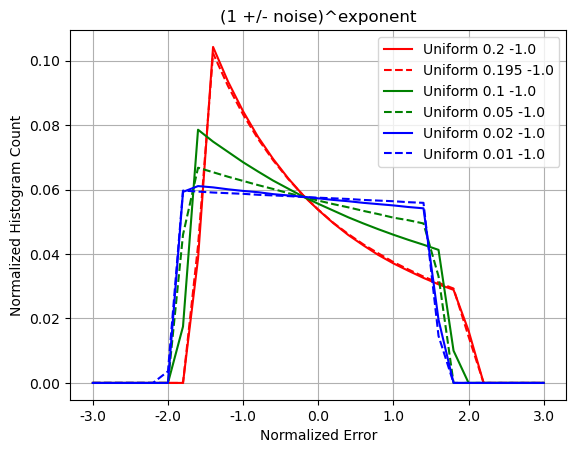

In [29]:
PlotHisto(sX=[-1])

# Expansion

In [30]:
df = pd.read_csv("./Java/Output/PowerExpansion.txt", sep='\t')
df.head()

,2n,Momentum,Exponent,Input Uncertainty,Term,Variance
0,2,1.0,-2.0,0.200,4.00,0.160000
1,2,1.0,-2.0,0.195,4.00,0.152100
2,2,1.0,-1.5,0.200,2.25,0.090000
3,2,1.0,-1.5,0.195,2.25,0.085556
4,2,1.0,-1.0,0.200,1.00,0.040000


In [31]:
def PlotTerms( value='Variance', sExp=[-2.0, -1.5, -1.0, -0.5], sDev=[0.2, 0.195],
               sStyle=['-', '--', 'x', '+'], sColor = ['r','g','b','y','c','m'],
               logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$')
    ax.set_xlabel('2n')
    ax.set_ylabel(f'Expanded {value} Term')
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for exp, color in zip(sExp, sColor):
        for dev, style in zip(sDev, sStyle):
            dfPlot = df[(df['Exponent']==exp) & (df['Input Uncertainty']==dev)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['2n'], dfPlot[value], ''.join([color, style]), label=f'{exp}  {dev}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))


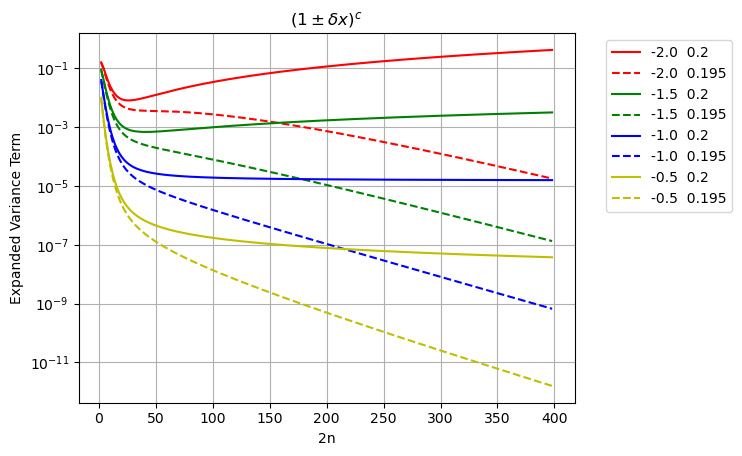

In [32]:
PlotTerms()